In [1]:
import pandas as pd
from typing import Type
import sys

sys.path.append("..")
from utils import print_memory_stats, change_obj_to_cat, get_memory_stats

file_name = "asteroid.zip"
column_types_name = "column_types.pkl"
ten_columns_name = "10_columns.csv"


def change_types(my_df: pd.DataFrame):
    memory_stats = get_memory_stats(my_df, file_name)
    print_memory_stats(memory_stats[0], memory_stats[1], memory_stats[2], "mem_res_no_opt.json")
    print("before:")
    print(my_df.info(memory_usage="deep"))
    change_obj_to_cat(my_df)
    memory_stats = get_memory_stats(my_df, file_name)
    print_memory_stats(memory_stats[0], memory_stats[1], memory_stats[2], "mem_res_opt.json")
    print("after:")
    print(my_df.info(memory_usage="deep"))


def save_10_columns(my_df: pd.DataFrame):
    column_names = [
        "name",
        "neo",
        "H",
        "diameter",
        "epoch",
        "equinox",
        "ma",
        "sigma_e",
        "class",
        "rms",
    ]
    types = my_df.dtypes.to_dict()
    rf = pd.read_csv(
        file_name,
        usecols=lambda x: x in column_names,
        dtype=types,
    )
    compression_options = dict(method="zip", archive_name=ten_columns_name)
    rf.to_csv(f"{ten_columns_name}.zip", index=False, compression="zip")

    compression_options = dict(method="zip", archive_name=column_types_name)
    pd.to_pickle(types, f"{column_types_name}.zip", compression=compression_options)


my_df = pd.read_csv(file_name, compression="zip")
change_types(my_df)
save_10_columns(my_df)

loaded_column_types = pd.read_pickle(f"{column_types_name}.zip", compression="zip")
df = pd.read_csv(f"{ten_columns_name}.zip", dtype=loaded_column_types, compression="zip")
df

,name,neo,H,diameter,epoch,equinox,ma,sigma_e,class,rms
0,Ceres,N,3.400000,939.400024,2458600.5,J2000,77.372101,4.819000e-12,MBA,0.43301
1,Pallas,N,4.200000,545.000000,2459000.5,J2000,144.975677,3.193400e-08,MBA,0.35936
2,Juno,N,5.330000,246.595993,2459000.5,J2000,125.435356,3.052000e-08,MBA,0.33848
3,Vesta,N,3.000000,525.400024,2458600.5,J2000,95.861938,2.332100e-10,MBA,0.39980
4,Astraea,N,6.900000,106.698997,2459000.5,J2000,17.846342,2.373700e-08,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...
958519,NaN,N,17.135000,NaN,2437203.5,J2000,342.057556,2.142200e-02,MBA,0.23839
958520,NaN,N,18.500000,NaN,2459000.5,J2000,260.113037,2.642000e-07,MBA,0.53633
958521,NaN,Y,20.400000,NaN,2459000.5,J2000,240.473602,6.636800e-08,APO,0.51556
958522,NaN,N,18.070999,NaN,2441956.5,J2000,355.351135,3.169800e-02,MBA,0.25641


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Top 5 Celestial Bodies by Class, except MBA')

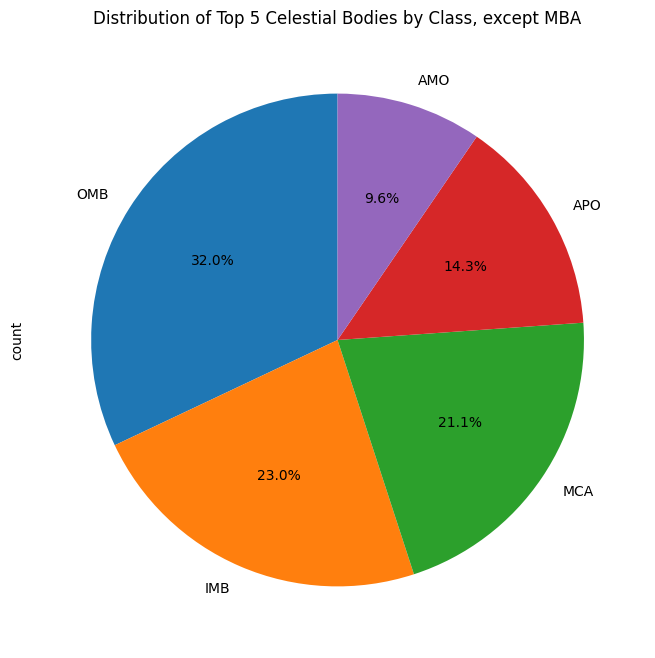

In [6]:
plt.figure(figsize=(8, 8))
df['class'].value_counts().iloc[1:].nlargest(5).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 5 Celestial Bodies by Class, except MBA')

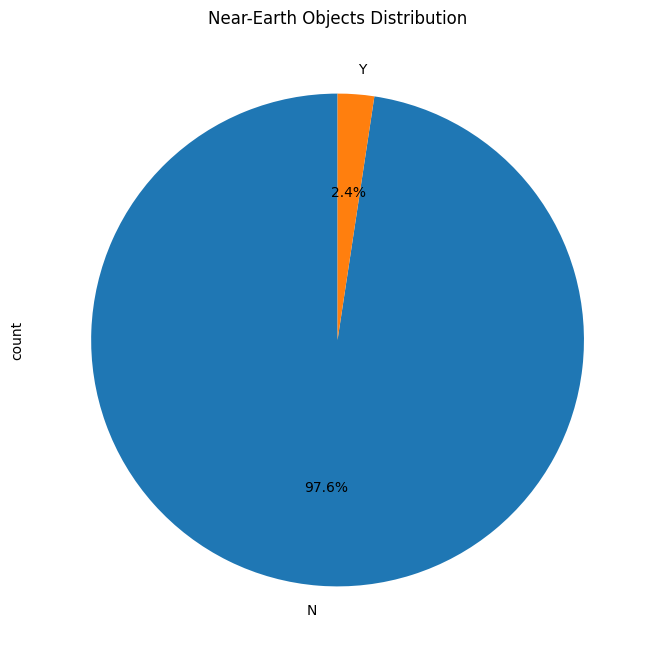

In [9]:
plt.figure(figsize=(8, 8))
df['neo'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Near-Earth Objects Distribution')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

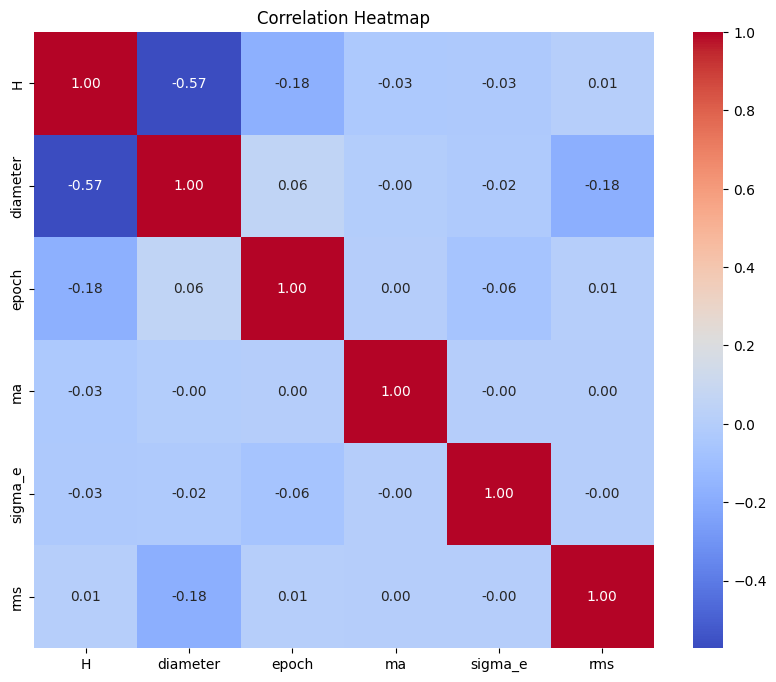

In [11]:
numeric_columns = df.select_dtypes(include=[float, int]).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

(0.0, 5000.0)

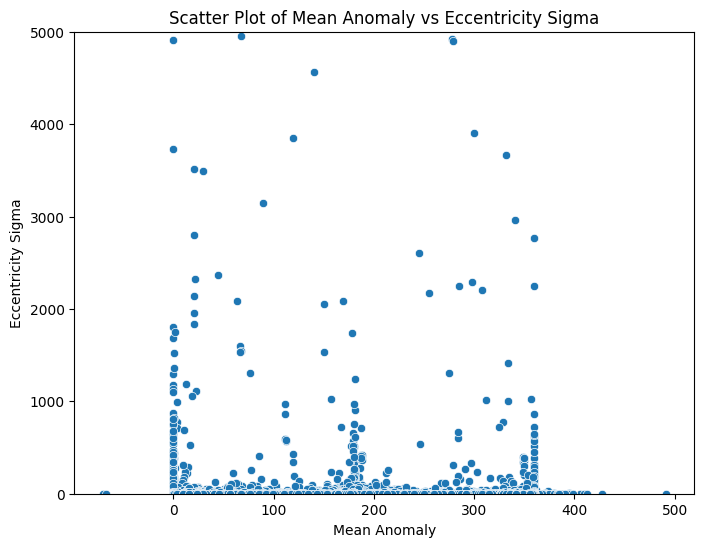

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ma', y='sigma_e', data=df)
plt.title('Scatter Plot of Mean Anomaly vs Eccentricity Sigma')
plt.xlabel('Mean Anomaly')
plt.ylabel('Eccentricity Sigma')
plt.ylim(0, 5000)

(0.0, 350.0)

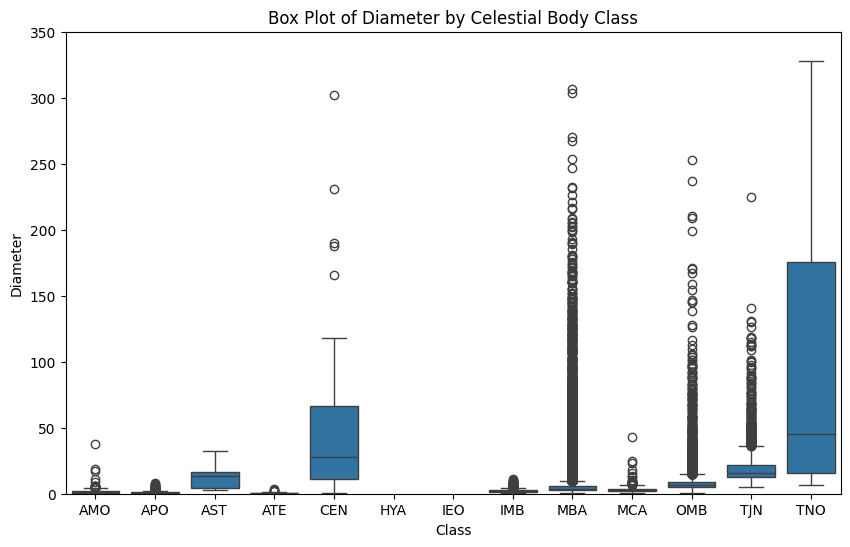

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='diameter', data=df)
plt.title('Box Plot of Diameter by Celestial Body Class')
plt.xlabel('Class')
plt.ylabel('Diameter')
plt.ylim(0, 350)